<a href="https://colab.research.google.com/github/mittalshivam123456-gif/Swiggy-Banglore-Outlet-Performance-analysis/blob/main/Bigmart_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("bigdatamart_Train.csv")

In [3]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [7]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

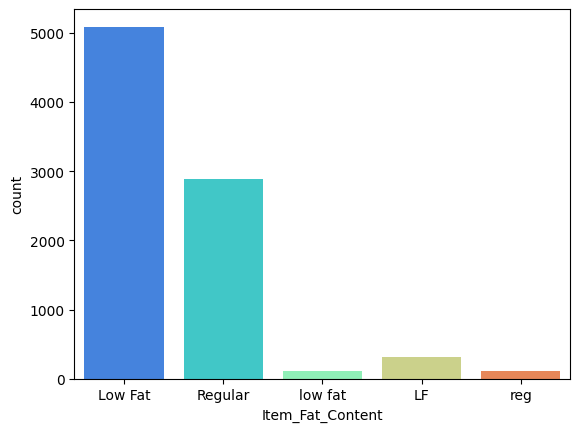

In [8]:
sns.countplot(x=data['Item_Fat_Content'],palette='rainbow')

In [9]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('LF','Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg','Regular')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('low fat','Low Fat')

In [10]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


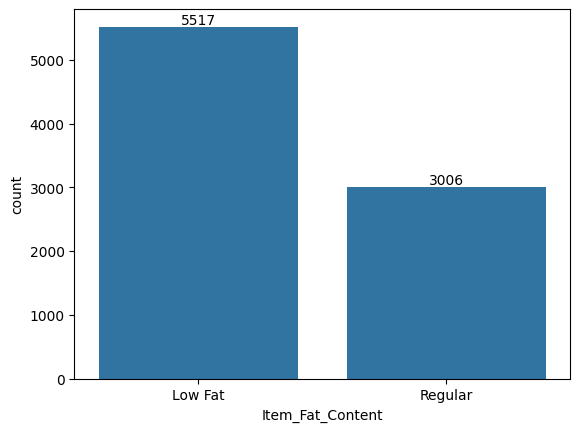

In [11]:
label=sns.countplot(x="Item_Fat_Content",data=data)
for i in label.containers:
  label.bar_label(i)

<Axes: ylabel='count'>

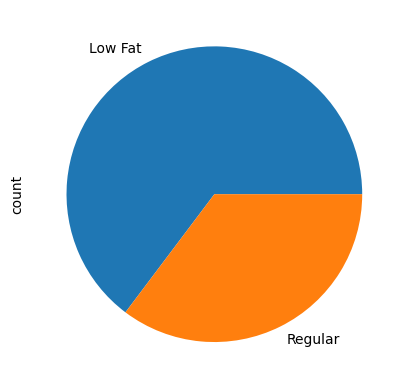

In [12]:
data["Item_Fat_Content"].value_counts().plot(kind="pie")

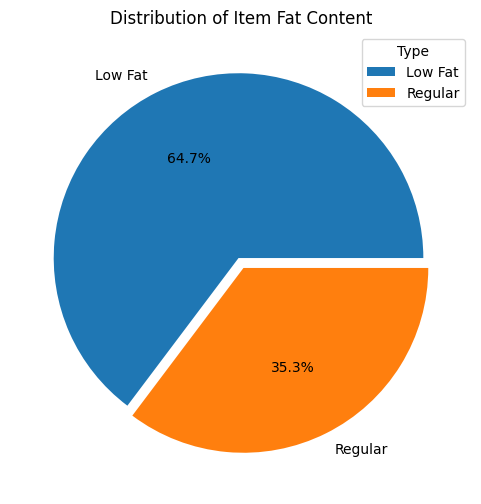

In [13]:
#create pie chart
plt.figure(figsize=(6,6))
plt.pie(data["Item_Fat_Content"].value_counts().values,labels=data["Item_Fat_Content"].value_counts().index,autopct='%1.1f%%',explode=[0.03,0.03])
plt.title('Distribution of Item Fat Content')
plt.legend(title="Type",loc='upper right')
plt.show()

In [14]:
data['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [15]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

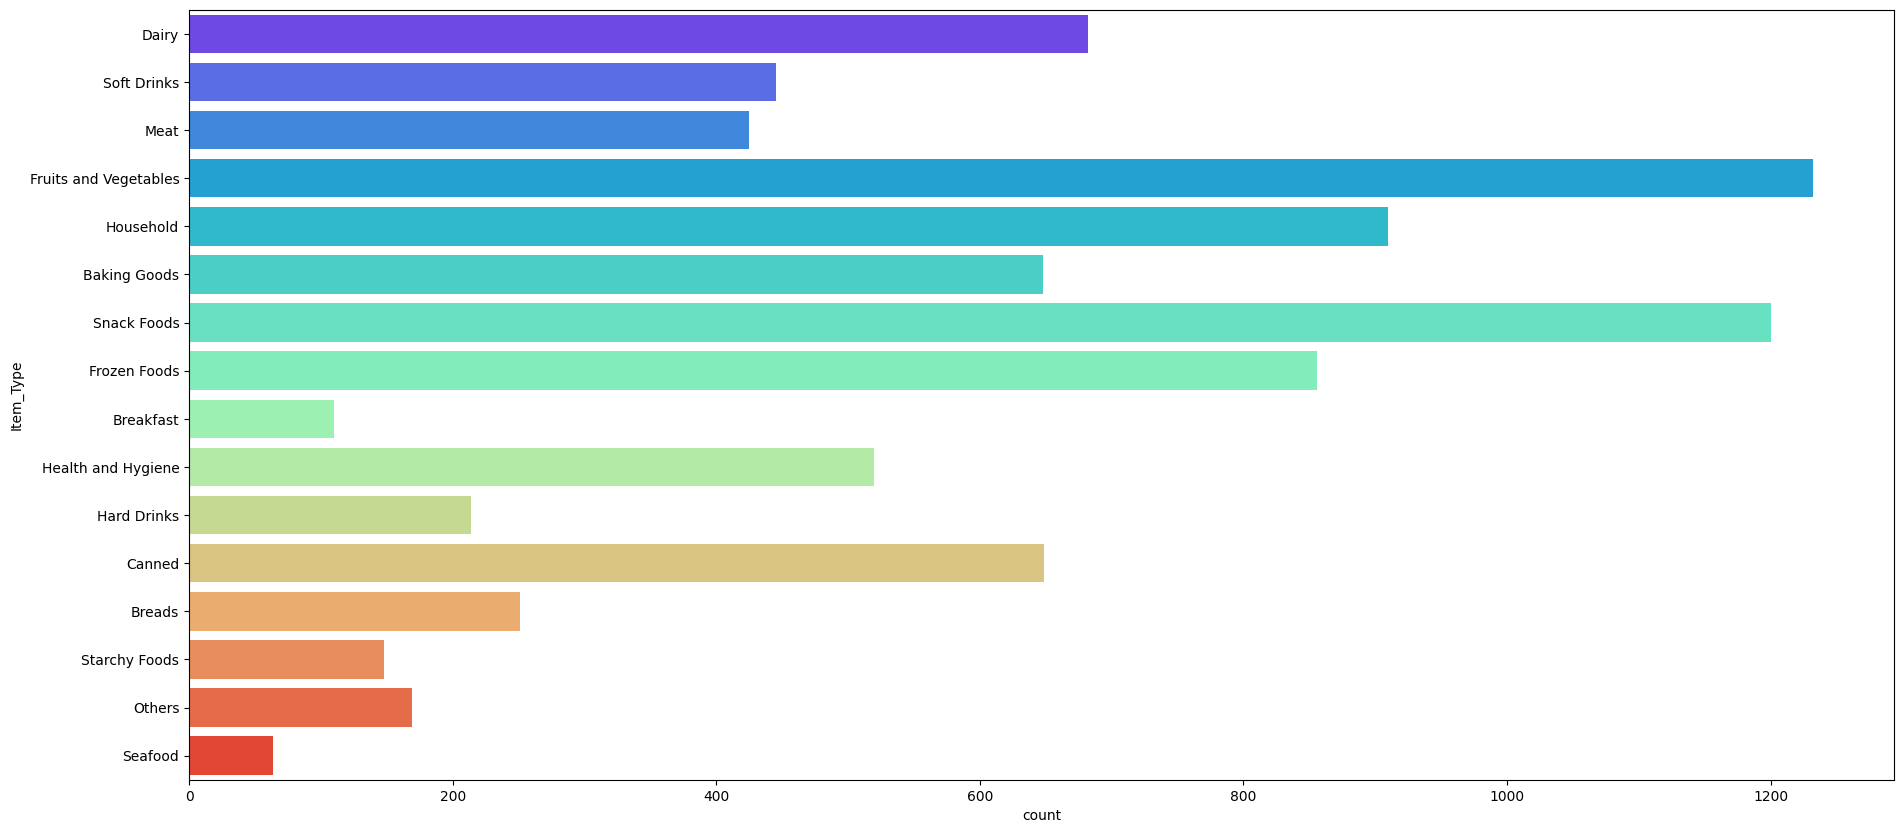

In [16]:
plt.figure(figsize=(22,10))
sns.countplot(y=data['Item_Type'], palette='rainbow')
plt.show()

In [17]:
data['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [18]:
data['Item_Type'].nunique()

16

In [19]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [20]:
x=['FDA15','DRC01','NCW30']
y=[]
for i in x:
  y.append(i[:2])
y

['FD', 'DR', 'NC']

In [21]:
#item type combine:
data["Item_Type_Combined"] = data['Item_Identifier'].apply(lambda x:x[:2])
data['Item_Type_Combined'].unique()

data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

,count
Item_Type_Combined,
Food,6125
Non-Consumable,1599
Drinks,799


In [22]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3918
Regular,3006
Non-Edible,1599


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

<Axes: xlabel='Outlet_Identifier', ylabel='count'>

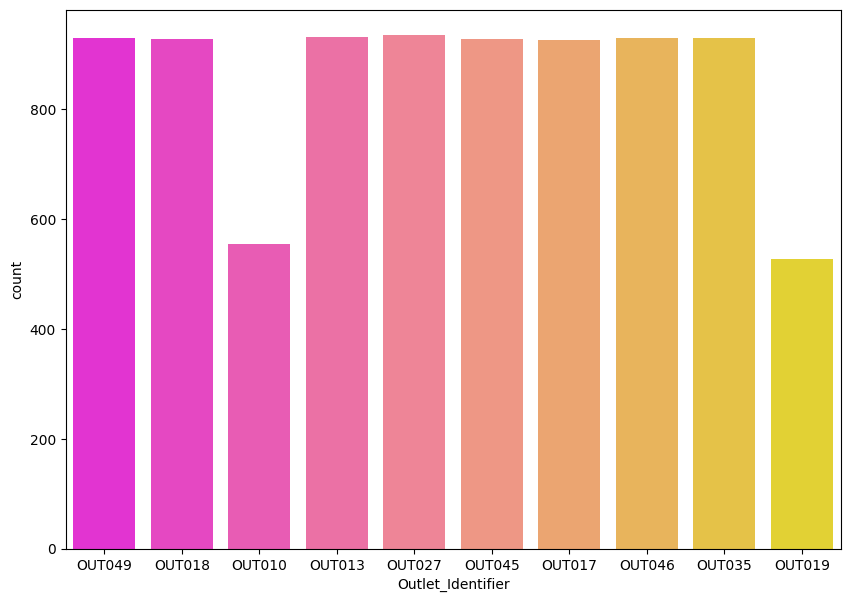

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['Outlet_Identifier'],palette='spring')


In [25]:
data['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


<Axes: xlabel='Outlet_Type', ylabel='count'>

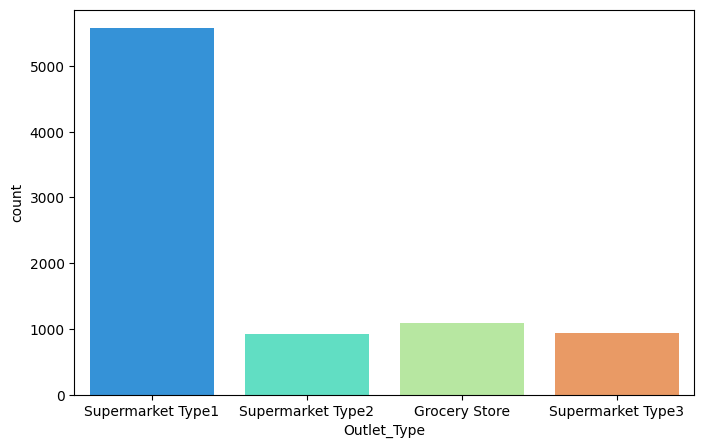

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Outlet_Type'],palette='rainbow')

In [27]:
#check mean sales by type:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [28]:
data['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

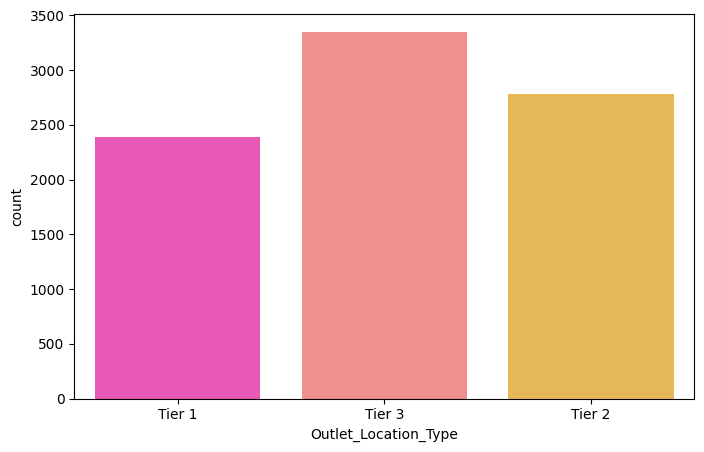

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Outlet_Location_Type'],palette='spring')

In [30]:
#check the main sales by type:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Location_Type')

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


In [31]:
data['Item_Weight'].isnull().sum()

np.int64(1463)

In [32]:
data['Item_Weight'] = data.groupby('Item_Type')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [33]:
data['Item_Weight'].isnull().sum()

np.int64(0)

In [34]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93000,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
5,FDP36,10.39500,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Food
6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Food
7,FDP10,12.98788,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Food
8,FDH17,16.20000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,Food
9,FDU28,19.20000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,Food


In [35]:
mean_item_weight=data.groupby('Item_Type').agg({'Item_Weight':'mean'})
mean_item_weight

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [36]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [37]:
data['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [38]:
data['Outlet_Size'].isna().sum()

np.int64(2410)

<Axes: xlabel='Outlet_Size', ylabel='count'>

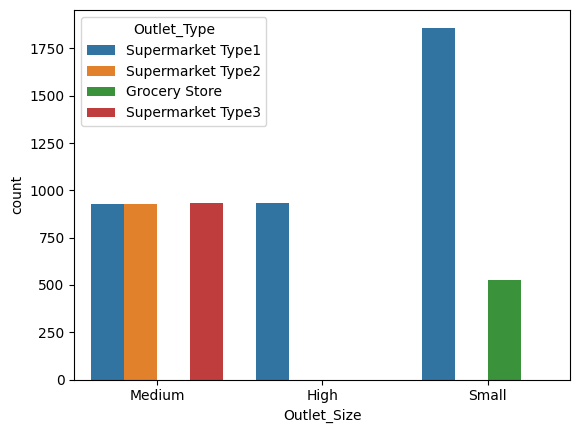

In [39]:
sns.countplot(x='Outlet_Size',hue='Outlet_Type',data=data)

In [40]:
data['Outlet_Size'].fillna("unknown",inplace=True)

In [41]:
data[data['Item_Visibility']==0]['Item_Identifier'].nunique()

446

In [42]:
data['Item_Visibility']=data['Item_Visibility'].replace(0,np.nan)

In [43]:
data['Item_Visibility'].fillna(data['Item_Visibility'].median(),inplace=True)

In [44]:
data[data['Item_Visibility']==0]['Item_Identifier'].nunique()

0

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

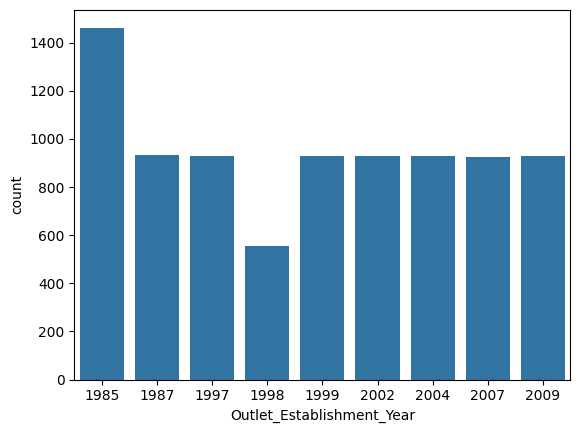

In [45]:
sns.countplot(x=data["Outlet_Establishment_Year"])

In [46]:
data['Outlet_Age'] = data['Outlet_Establishment_Year'].apply(lambda x:2013-x)

In [47]:
data['Outlet_Age'].head()

,Outlet_Age
0,14
1,4
2,14
3,15
4,26


In [48]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,unknown,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [49]:
data.shape

(8523, 14)

In [50]:
numerical=data.select_dtypes(exclude="object")
numerical.shape

(8523, 6)

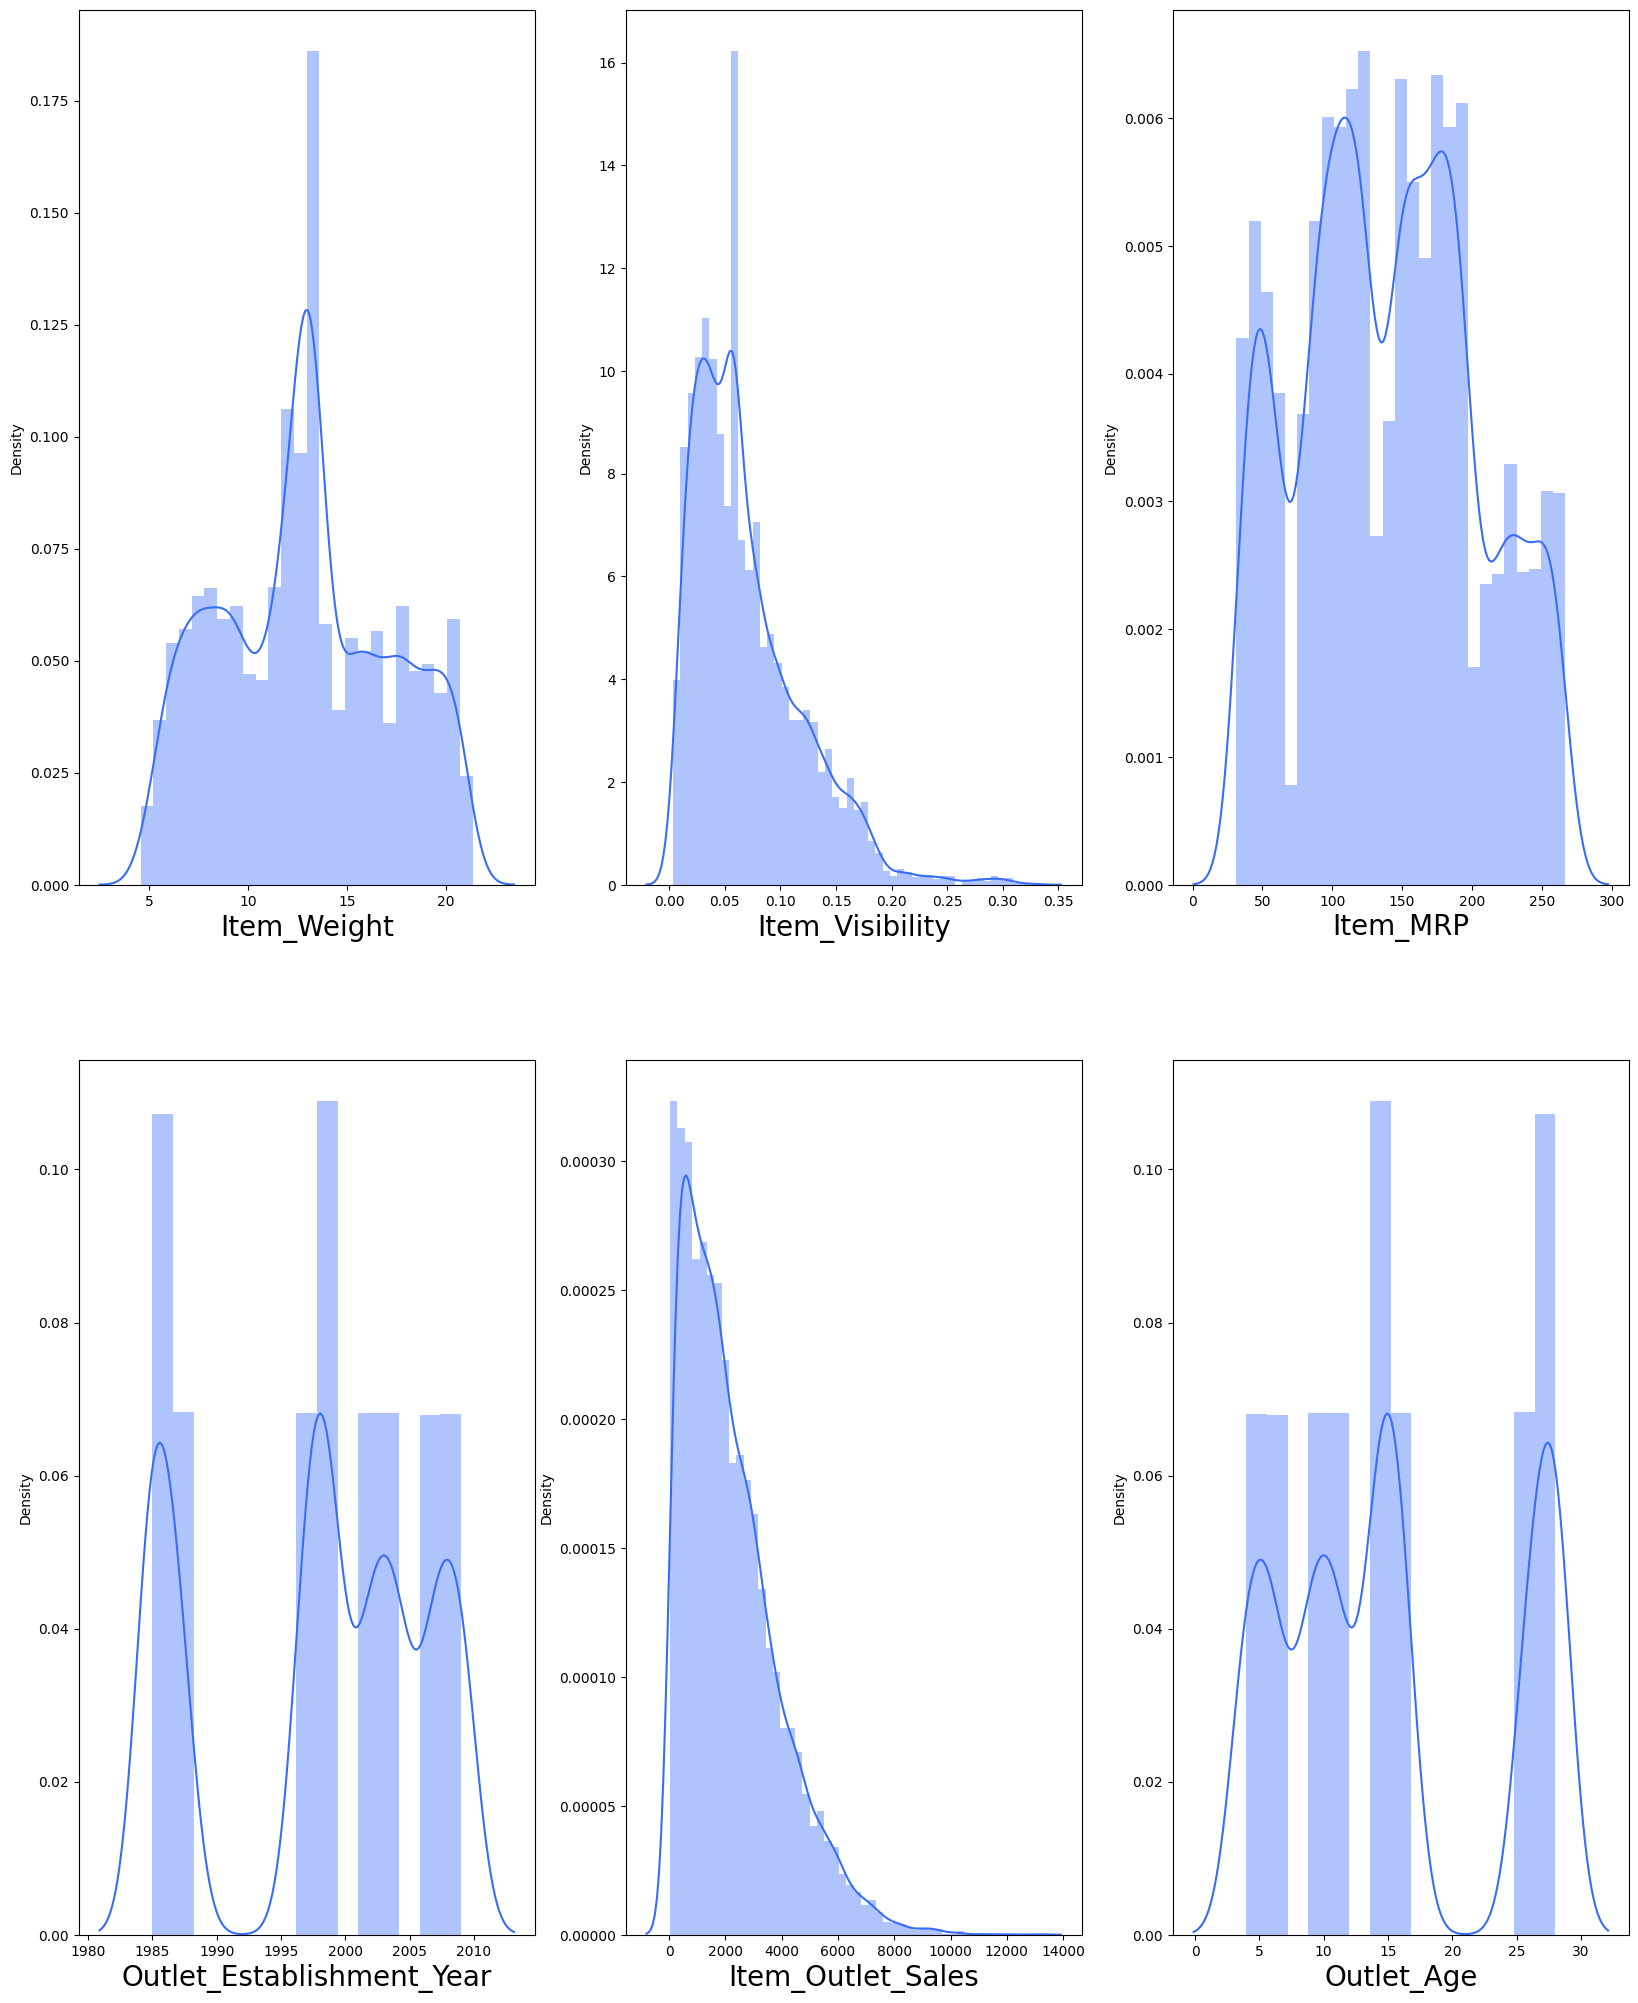

In [51]:
plt.figure(figsize=(20,25),facecolor='white')
sns.set_palette('rainbow')
plotnumber=1
for column in numerical:
  if plotnumber <=6:
    ax=plt.subplot(2,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()

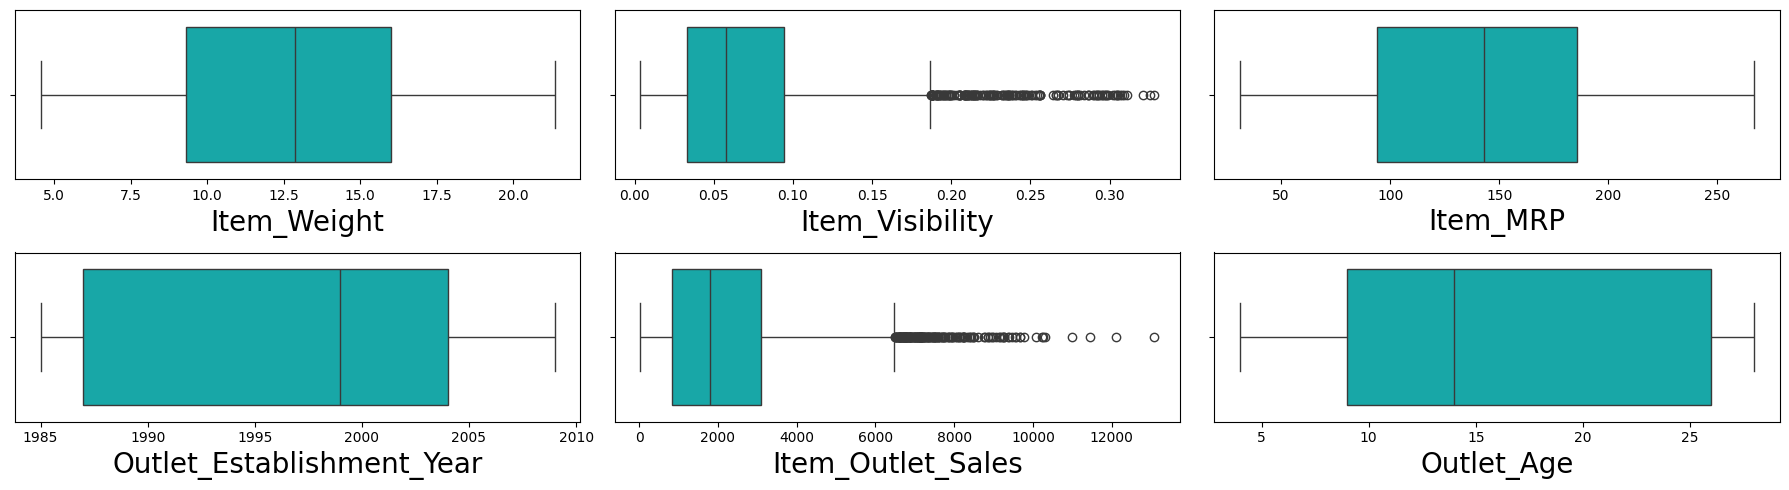

In [52]:
plt.figure(figsize=(18,5),facecolor='white')
plotnumber=1
for column in numerical:
  if plotnumber <=6:
   ax=plt.subplot(2,3,plotnumber)
   sns.boxplot(x=data[column],color='c')
   plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()
plt.show()

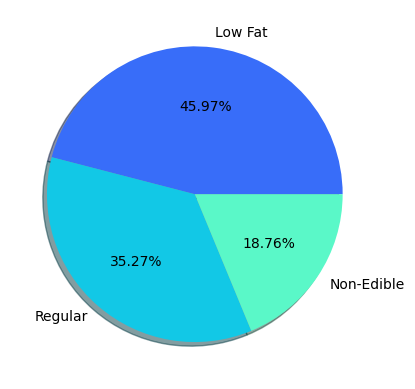

In [53]:
plt.pie(data.Item_Fat_Content.value_counts(),
        labels = data.Item_Fat_Content.value_counts().index,radius=1,
        autopct = '%1.2f%%',shadow=True)
plt.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

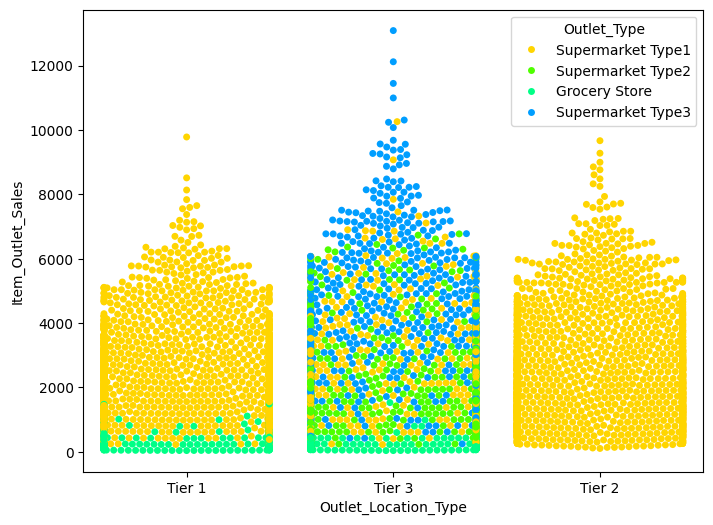

In [54]:
sns.set_palette('hsv')
plt.figure(figsize=(8,6))

sns.swarmplot(data=data,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type')

In [55]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Location_Type')

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


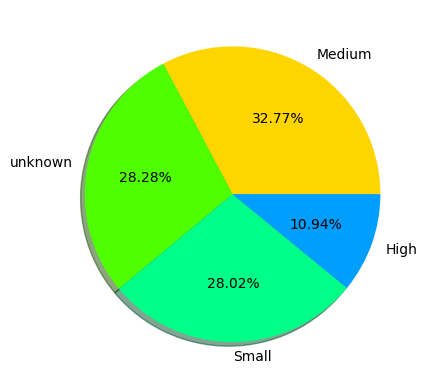

In [56]:
plt.pie(data.Outlet_Size.value_counts(),
        labels = data.Outlet_Size.value_counts().index,radius =1,autopct = '%1.2f%%',shadow=True)
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

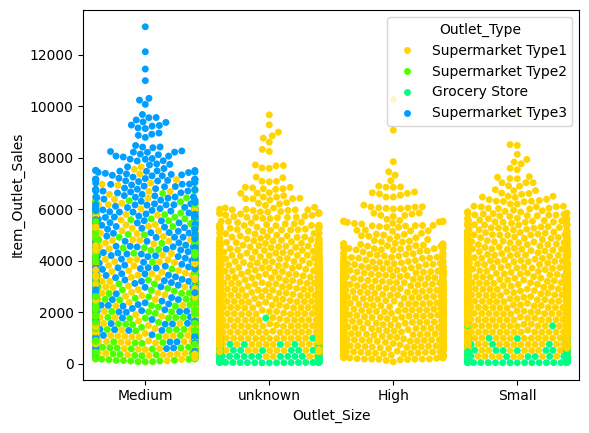

In [57]:
sns.swarmplot(data=data, x='Outlet_Size', y='Item_Outlet_Sales',hue="Outlet_Type")

Text(0.5, 1.0, 'sales based on item visibility sorted by item type')

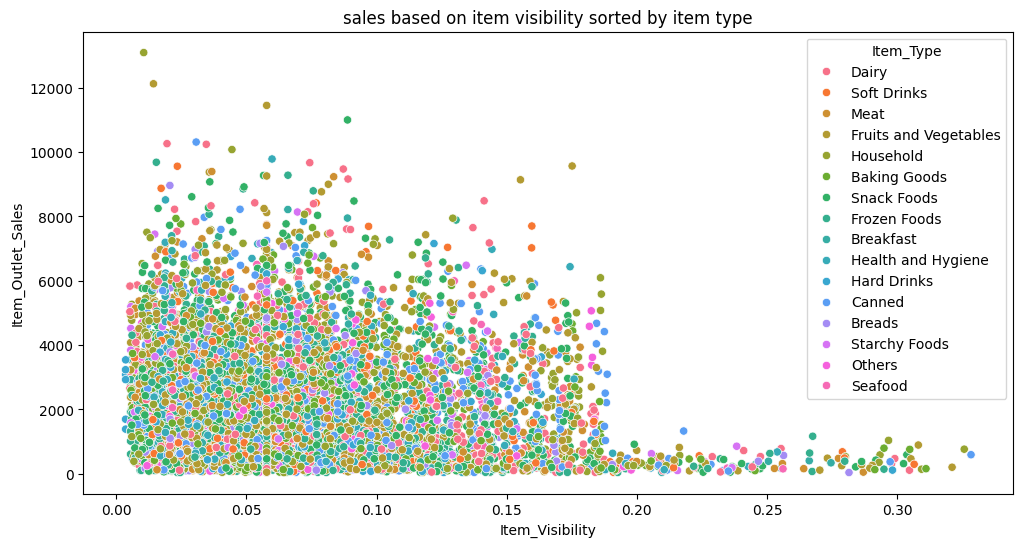

In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',data=data)
plt.title("sales based on item visibility sorted by item type")

Text(0.5, 1.0, 'Sales based on item visibility sorted by item type combined')

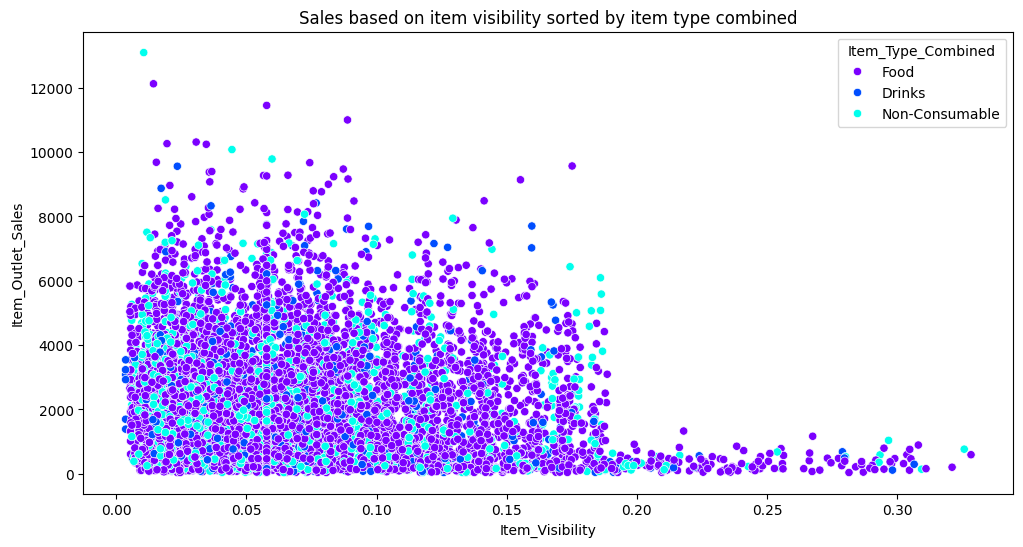

In [59]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(12,6))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type_Combined',data=data)
plt.title("Sales based on item visibility sorted by item type combined")

Text(0.5, 1.0, 'Salees based on Item Visibility Sorted by Item Type Combined')

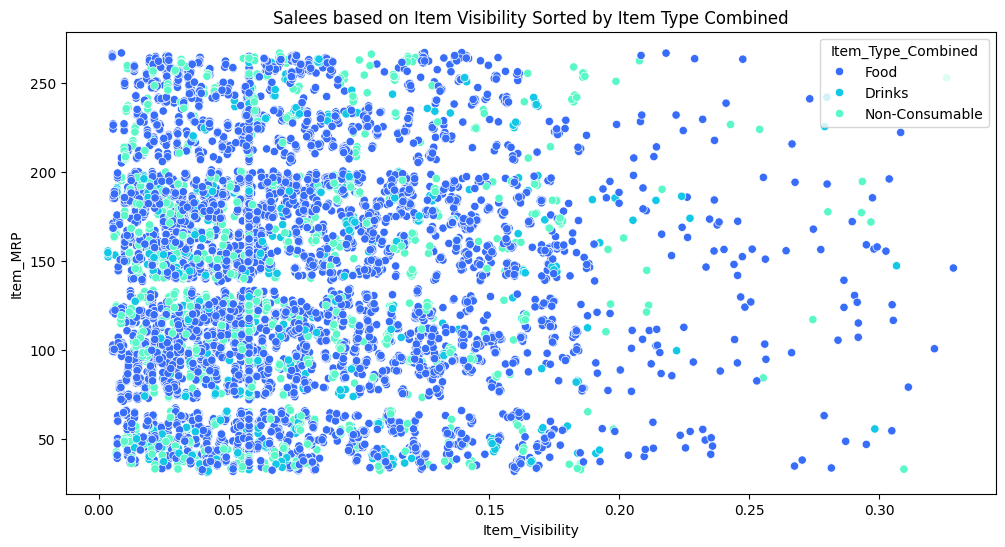

In [60]:
sns.set_palette('rainbow')
plt.figure(figsize=(12,6))
sns.scatterplot(x='Item_Visibility',y='Item_MRP',hue='Item_Type_Combined',data=data)
plt.title("Salees based on Item Visibility Sorted by Item Type Combined")

Text(0.5, 1.0, 'Sales based on Item MRP Sorted by outlet type combined')

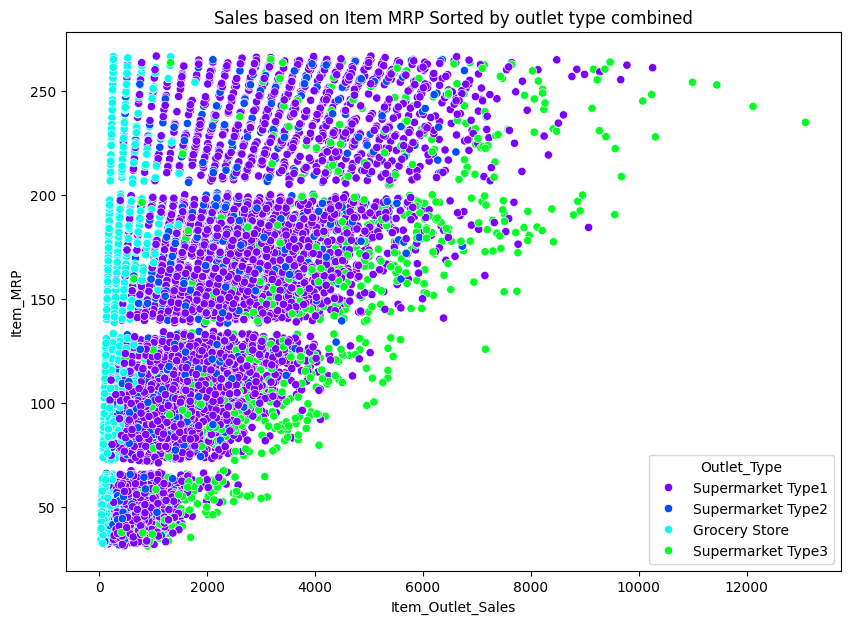

In [61]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=[10,7])
sns.scatterplot(x='Item_Outlet_Sales',y='Item_MRP',hue='Outlet_Type',data=data)
plt.title("Sales based on Item MRP Sorted by outlet type combined")

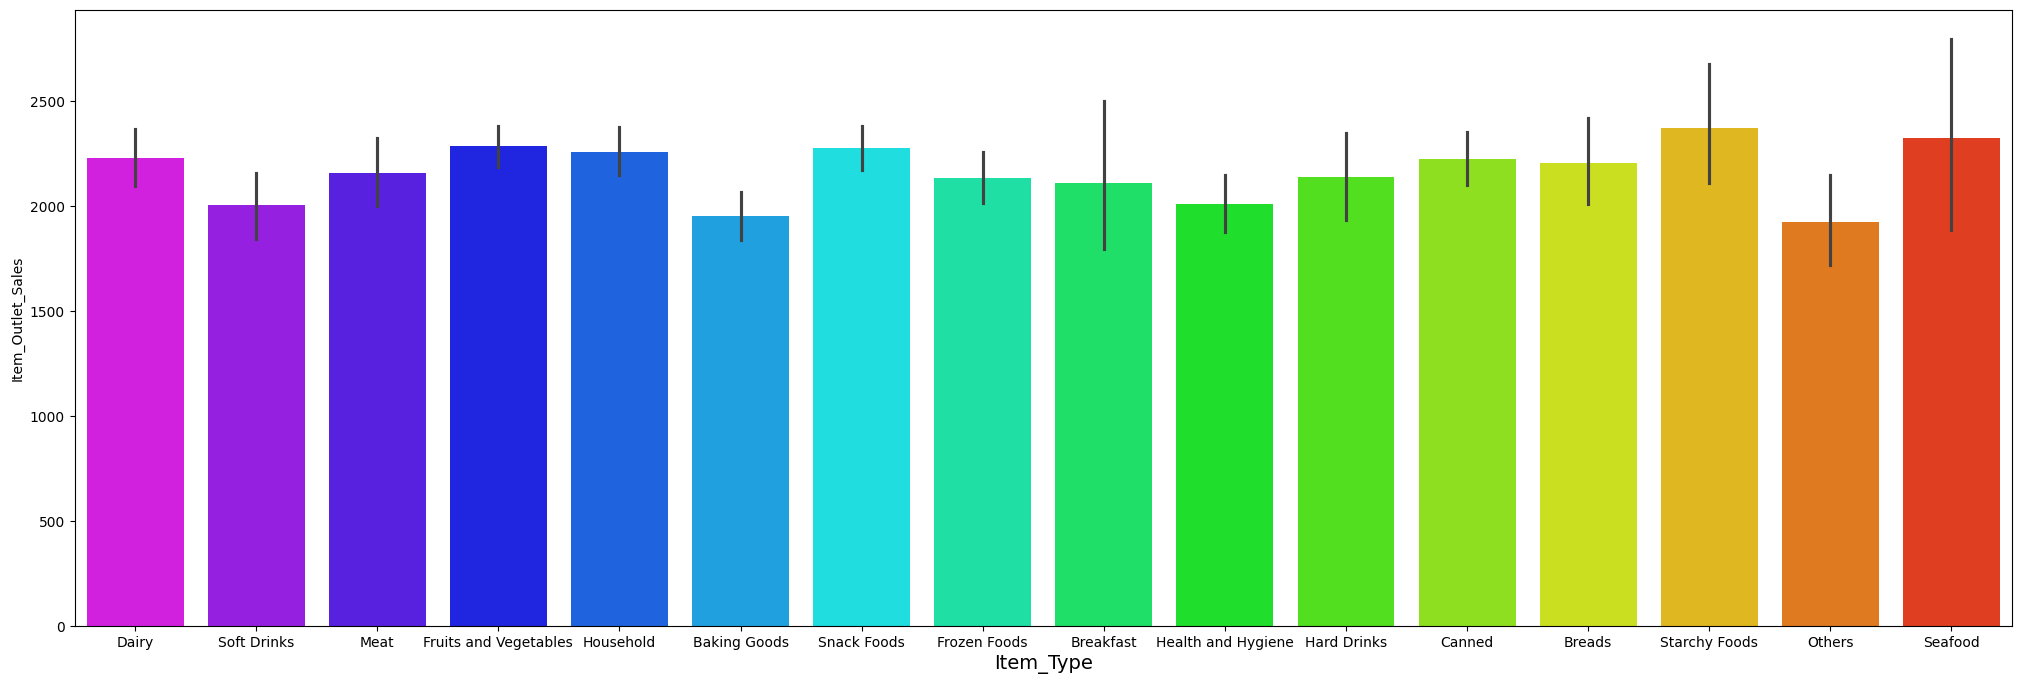

In [62]:
plt.figure(figsize=(25,8))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data,palette='gist_rainbow_r')
plt.xlabel('Item_Type',fontsize=14)
plt.show()

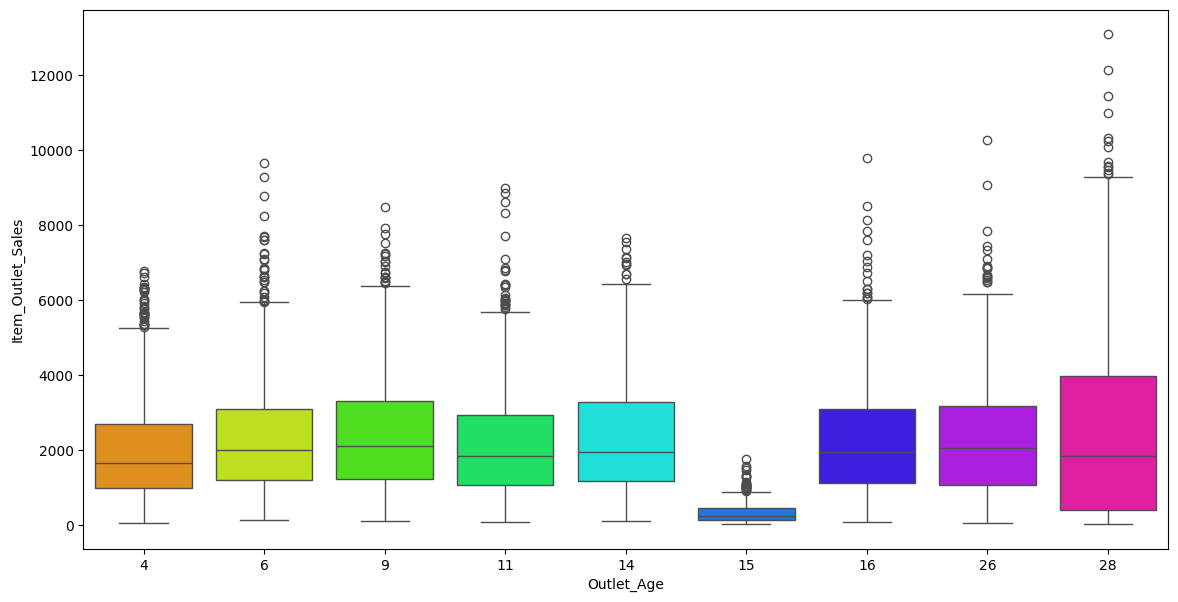

In [63]:
plt.figure(figsize=(14,7))
ax = sns.boxplot(x='Outlet_Age',y='Item_Outlet_Sales',data=data,palette="hsv")

<Axes: xlabel='Outlet_Establishment_Year'>

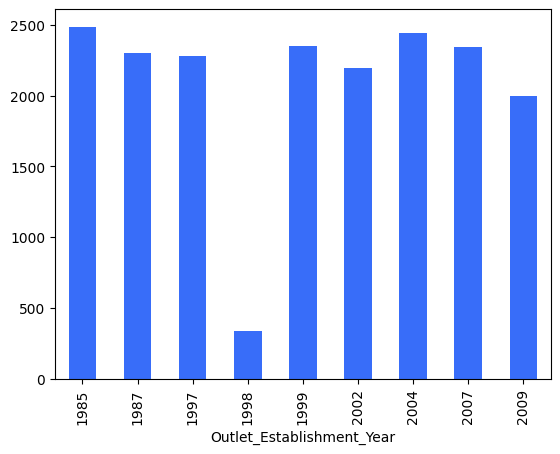

In [64]:
sns.set_palette('rainbow')
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

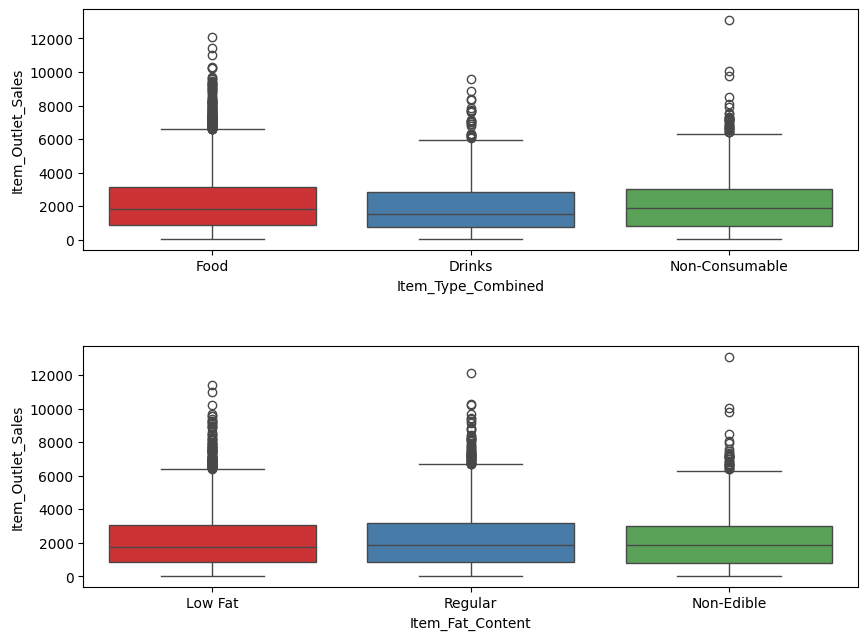

In [65]:
plt.figure(figsize=(10,9))

plt.subplot(411)
ax = sns.boxplot(x='Item_Type_Combined',y='Item_Outlet_Sales',data=data,palette="Set1")

plt.subplot(412)
ax = sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data,palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top=1.5)

plt.show()

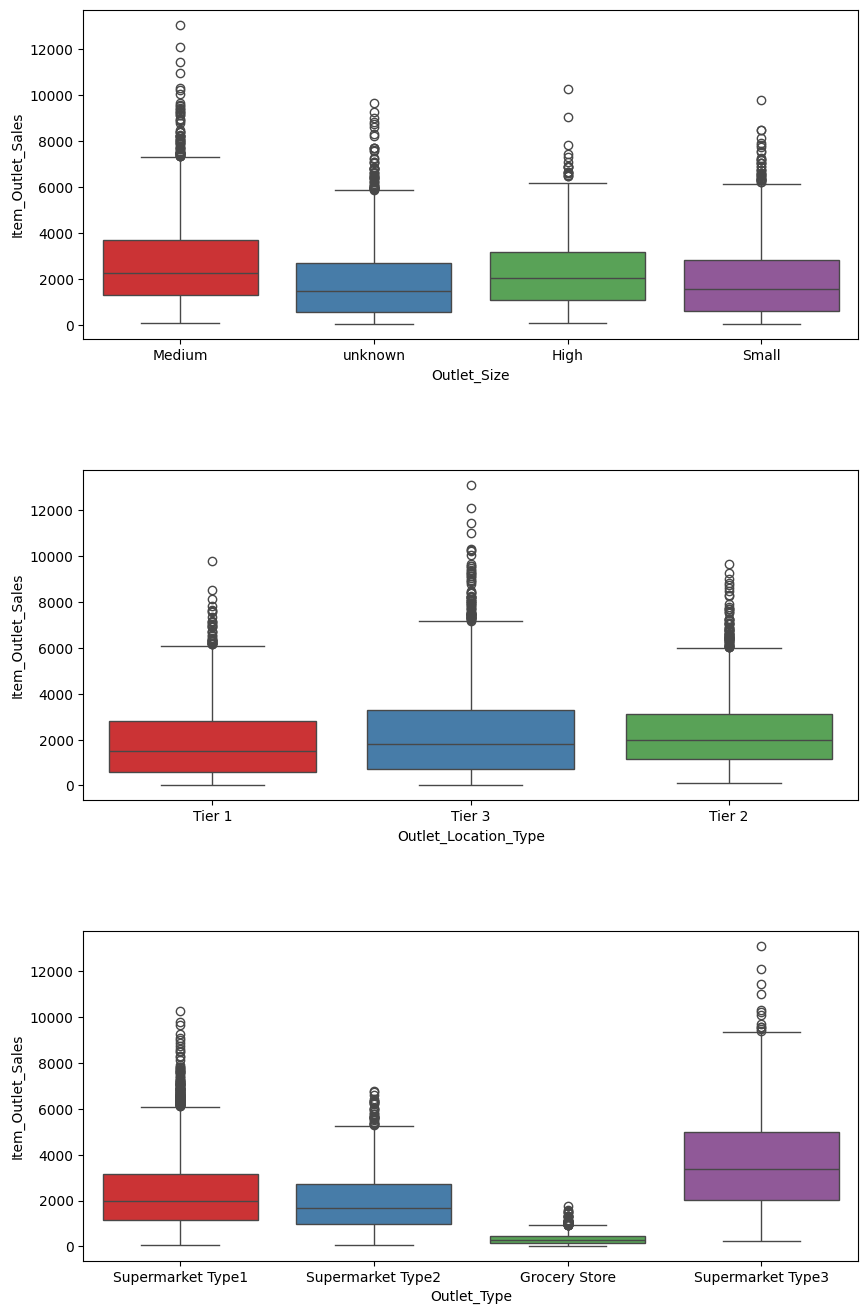

In [66]:
plt.figure(figsize=(10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data,palette="Set1")

plt.subplots_adjust(wspace = 0.2 , hspace = 0.4,top=1.5)

plt.show()

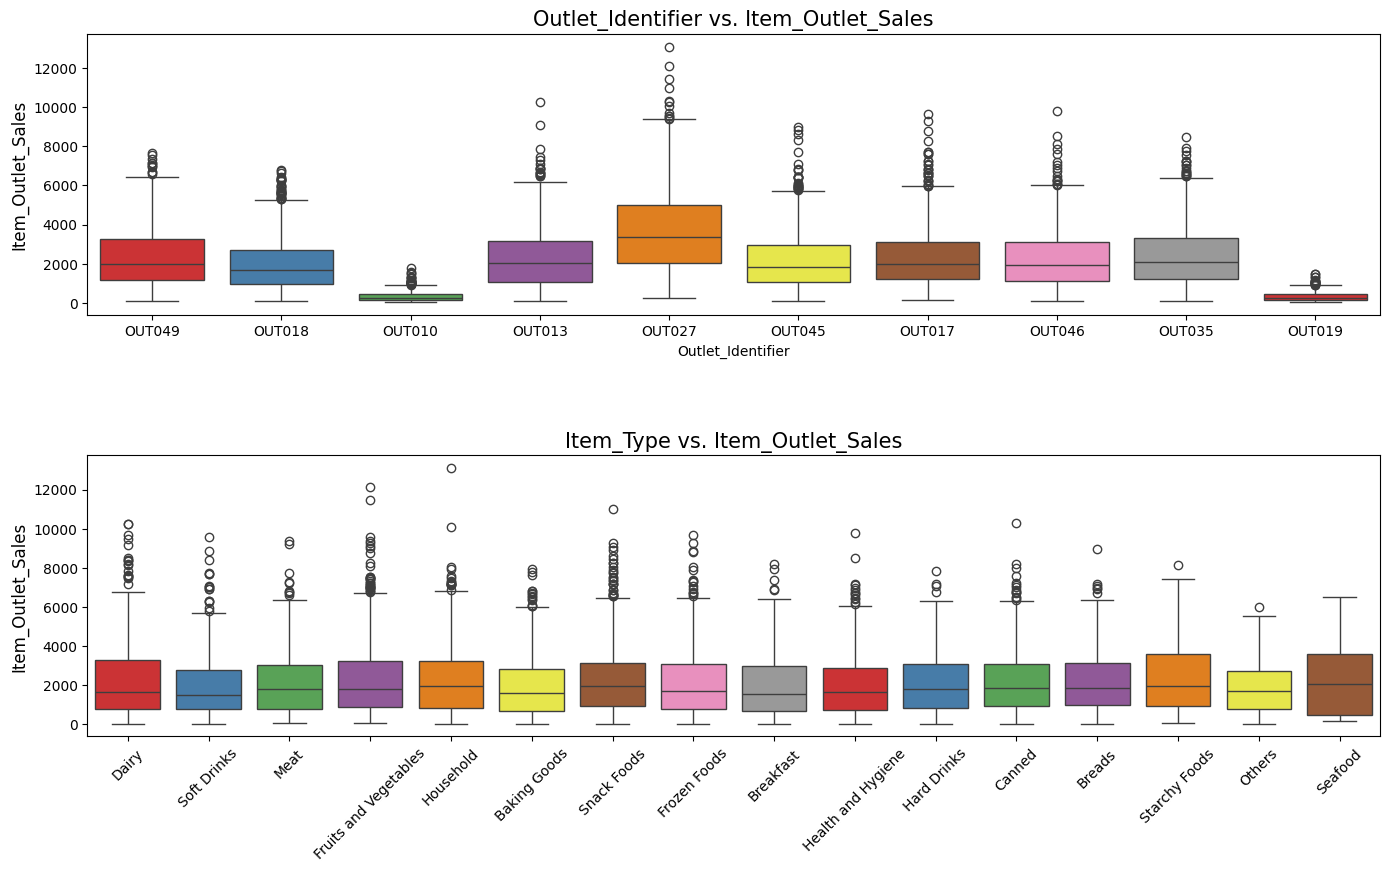

In [67]:

plt.figure(figsize=(14,16))

plt.subplot(411)
ax = sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data,palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales",fontsize=15)
ax.set_ylabel("Item_Outlet_Sales",fontsize=12)

plt.subplot(412)
ax = sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=data,palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales",fontsize=15)
ax.set_xlabel("",fontsize=12)
ax.set_ylabel("Item_Outlet_Sales",fontsize=12)

plt.subplots_adjust(hspace = 0.9,top=0.9)
plt.setp(ax.get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()

<Figure size 2200x900 with 0 Axes>

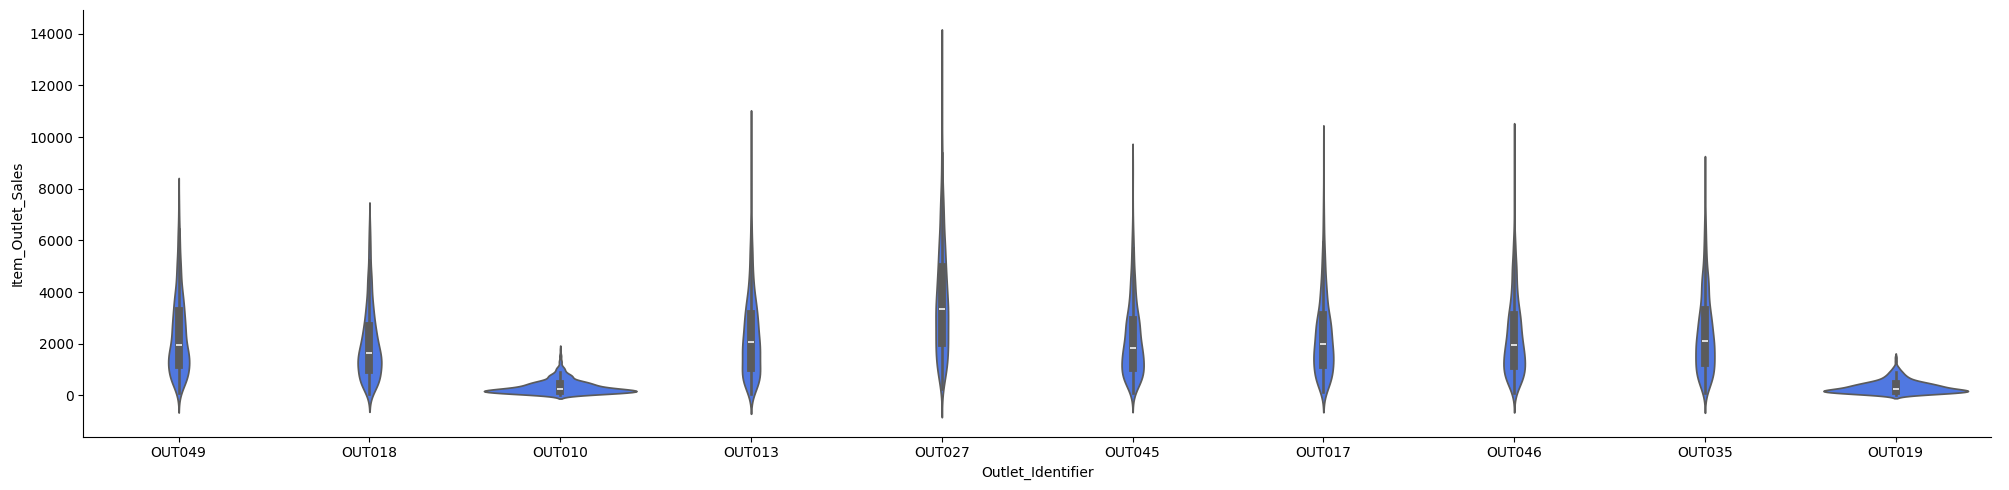

In [71]:
plt.figure(figsize=(22,9))
sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',kind='violin',data=data,aspect=4)
plt.tight_layout()

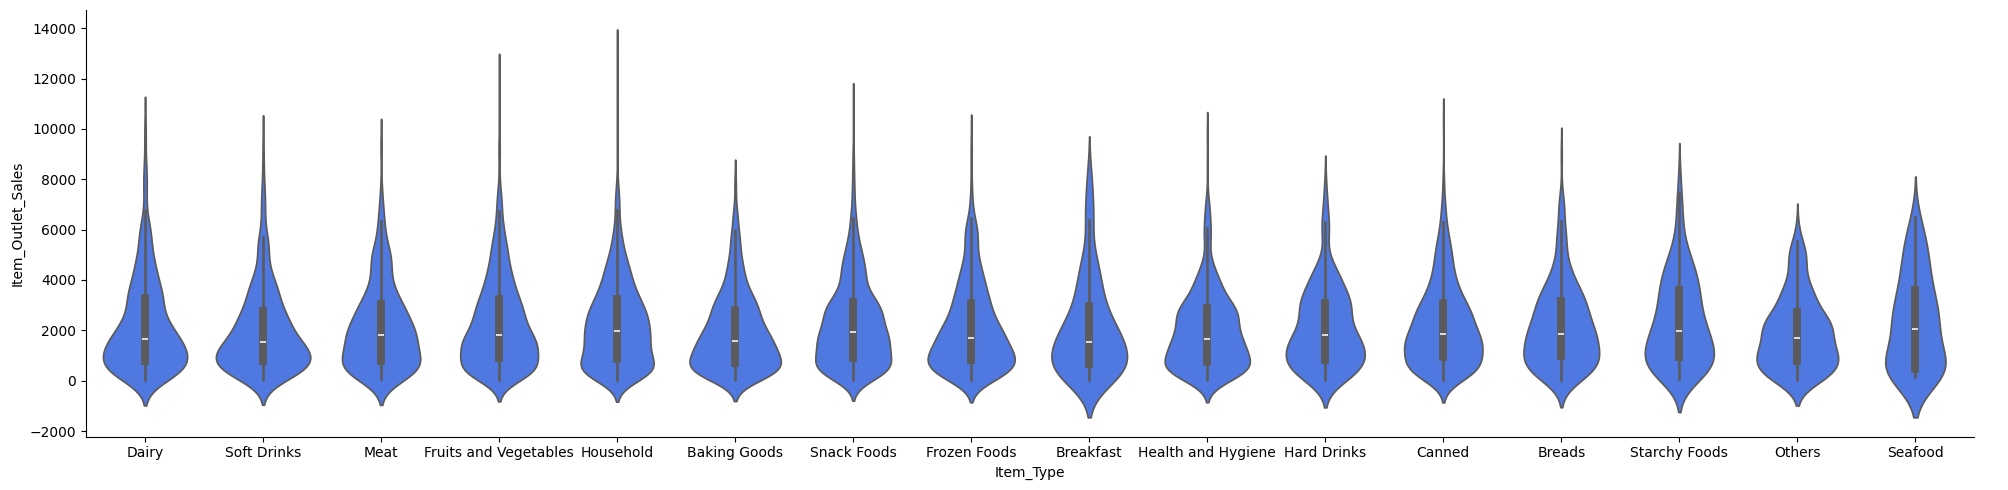

In [72]:
sns.catplot(x = 'Item_Type',y='Item_Outlet_Sales',kind='violin',data=data,aspect=4)